In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
!pip install lazypredict

In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np

coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/distan_lat42.22lon-8.63p2R1Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [1]:
import pandas as pd
import numpy as np

station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/LEVX_20192020.csv",
                          usecols =["time","wxcodes_o"],
                          parse_dates=["time"]).dropna().set_index("time")

pd.options.display.max_rows = 999
station["wxcodes_o"].value_counts(normalize=True).map(lambda n: '{:.1%}'.format(n))

M              74.1%
BCFG            7.0%
FG              3.6%
-RA             2.1%
BR              1.5%
RA              1.2%
-RA BCFG        1.0%
RA BCFG         0.7%
BCFG -RA        0.7%
-RA BR          0.6%
RA FG           0.6%
-RA FG          0.6%
RA BR           0.5%
BCFG RA         0.5%
SHRA            0.4%
-DZ             0.3%
VCFG            0.3%
FG DZ           0.3%
FG -RA          0.3%
BCFG -DZ        0.2%
DZ              0.2%
FG RA           0.2%
-DZ FG          0.2%
FG -DZ          0.2%
DZ BCFG         0.2%
+RA FG          0.2%
DZ FG           0.2%
BCFG DZ         0.1%
DZ BR           0.1%
-DZ BCFG        0.1%
-RADZ BCFG      0.1%
-DZ BR          0.1%
+RA BCFG        0.1%
-RADZ           0.1%
+DZ FG          0.1%
-SHRA           0.1%
-RADZ BR        0.1%
+SHRA           0.1%
+RA BR          0.1%
BR RA           0.1%
+RA             0.1%
TS              0.1%
BR -DZ          0.1%
-RADZ FG        0.1%
FG -RADZ        0.1%
BR -RA          0.0%
SHRA BCFG       0.0%
+DZ BR       

In [2]:
#label ra/dz

station["prec_l"] = "No RA/DZ"
mask = station['wxcodes_o'].str.contains("RA")
station.loc[mask,["prec_l"]] = "RA/DZ"
mask = station['wxcodes_o'].str.contains("DZ")
station.loc[mask,["prec_l"]] = "RA/DZ"

print(station.sample(100))
print("*****************************")
station["prec_l"].value_counts(normalize=True)

                    wxcodes_o    prec_l
time                                   
2020-07-04 20:00:00         M  No RA/DZ
2020-01-24 01:30:00         M  No RA/DZ
2018-11-12 03:30:00      BCFG  No RA/DZ
2019-04-23 01:30:00       -RA     RA/DZ
2018-11-22 21:30:00      BCFG  No RA/DZ
2020-07-06 13:00:00         M  No RA/DZ
2019-09-09 06:30:00         M  No RA/DZ
2019-08-01 01:30:00         M  No RA/DZ
2020-12-16 13:30:00         M  No RA/DZ
2020-03-01 01:00:00         M  No RA/DZ
2019-08-14 21:00:00        FG  No RA/DZ
2020-03-22 15:00:00         M  No RA/DZ
2020-01-09 13:00:00         M  No RA/DZ
2020-08-05 13:00:00         M  No RA/DZ
2020-01-22 10:30:00         M  No RA/DZ
2019-08-09 17:30:00         M  No RA/DZ
2018-10-06 04:00:00         M  No RA/DZ
2019-10-01 10:30:00         M  No RA/DZ
2020-09-20 09:30:00      BCFG  No RA/DZ
2020-10-23 06:00:00        FG  No RA/DZ
2020-01-06 23:30:00        FG  No RA/DZ
2020-10-21 05:00:00  -RA BCFG     RA/DZ
2019-06-21 19:30:00         M  No RA/DZ


No RA/DZ    0.867321
RA/DZ       0.132679
Name: prec_l, dtype: float64

**Forecast D0**

In [3]:
#ria forecast d0
model1k = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/lat42.22lon-8.63p2R1KmD0.csv",parse_dates=["time"]).set_index("time")

model1k

,Unnamed: 0,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 01:00:00,0,143.268921,0.0,1801.360962,0.789023,1.467980,103158.796875,280.410004,0.823894,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5730.042969,1595.621948,253.857193,283.275238
2019-01-01 02:00:00,1,152.222214,0.0,1766.035156,1.437459,2.645142,103178.460938,279.987000,0.822755,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5729.319824,1597.058472,253.848557,282.842499
2019-01-01 03:00:00,2,154.053619,0.0,1728.199341,1.304144,2.414089,103142.132812,279.750885,0.820316,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5724.619141,1593.626953,253.876816,282.377808
2019-01-01 04:00:00,3,162.321548,0.0,1716.658325,1.242218,2.291945,103172.617188,279.614197,0.806320,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5725.305664,1596.243408,253.810440,282.195923
2019-01-01 05:00:00,4,167.243256,0.0,1718.675293,0.790160,1.460847,103175.796875,279.555634,0.787751,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5724.179199,1596.257935,253.821121,282.136566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,16762,316.116913,0.0,800.844543,5.403949,10.236845,101375.132812,279.880554,0.861849,24050.560547,...,22.750000,-12.612812,0.0,0.000000,0.0,0.000000,5360.758301,1434.292603,243.570251,271.706177
2020-12-31 20:00:00,16763,318.488983,0.0,708.539551,4.331174,8.753118,101517.437500,279.643799,0.881646,24048.224609,...,34.250000,-4.223125,0.0,0.300000,0.1,0.300000,5362.556641,1437.166504,242.893250,271.008636
2020-12-31 21:00:00,16764,314.300262,0.0,763.025513,3.515929,6.365382,101593.578125,279.461945,0.917659,24056.218750,...,30.620001,-5.149188,0.0,0.070246,0.0,0.070246,5366.014160,1441.580811,242.227005,271.706116


In [4]:
#concat station model
df_all1k = pd.concat([station,model1k],axis=1).drop(columns=["wxcodes_o","Unnamed: 0"]).dropna()
df_all1k.sample(20)

,prec_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2020-01-03 21:00:00,No RA/DZ,28.922653,0.0,1657.181152,1.498657,2.758156,103496.664062,281.027863,1.000000,24234.029297,...,0.000000,-2.460938e-04,0.000000,0.000000,0.00000,0.000000,5731.236816,1601.275146,254.360748,277.234009
2020-10-17 12:00:00,No RA/DZ,168.063553,0.0,1935.912842,5.747344,7.680449,101686.796875,288.484863,0.758158,24085.966797,...,0.000000,-1.835937e-04,0.000000,0.000000,0.00000,0.000000,5597.158203,1489.249146,255.843445,279.549316
2019-04-03 07:00:00,No RA/DZ,348.574219,0.0,688.055420,3.377696,6.915440,101657.343750,279.503174,0.870746,24071.285156,...,11.332000,-7.495347e+00,0.000000,0.072423,0.00000,0.072423,5491.769043,1441.347900,253.611694,270.702515
2019-01-29 07:00:00,No RA/DZ,263.733490,0.0,1056.117676,6.801250,13.878156,101869.234375,282.678589,0.969486,24232.605469,...,54.849998,-2.382813e-04,0.300000,1.000000,0.53125,1.000000,5527.219238,1475.049072,252.717133,274.700195
2019-10-16 10:00:00,RA/DZ,182.715393,0.0,2327.795410,8.032588,15.430438,101538.460938,287.444885,0.947905,14634.337891,...,0.000000,-1.875000e-03,0.000000,0.800000,0.80000,0.800000,5636.826172,1484.179199,260.414429,282.539062
2019-01-05 09:00:00,No RA/DZ,180.832733,0.0,1698.573242,0.685920,1.300373,103515.515625,278.319550,0.672419,24135.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000,5738.937500,1619.495728,253.706757,281.757996
2020-01-15 08:00:00,No RA/DZ,315.629547,0.0,1400.521729,3.246890,6.461652,101633.234375,282.793213,0.992569,24229.216797,...,7.410000,-5.059375e-01,0.000000,0.253579,0.00000,0.253579,5502.204102,1464.280884,249.546692,277.140015
2019-11-03 05:00:00,No RA/DZ,287.990143,0.0,1891.637573,6.650392,12.649848,100718.156250,285.408936,0.930980,7435.659180,...,25.639999,-1.162070e+00,0.000000,0.400000,0.00000,0.400000,5537.655762,1415.747559,260.371887,277.824799
2020-12-14 17:00:00,No RA/DZ,251.580750,0.0,1320.873169,4.276048,10.160841,100764.335938,283.963684,0.882948,24041.634766,...,329.660004,-3.460937e-01,0.000000,0.304972,0.30000,0.304972,5384.125977,1408.049561,248.789246,275.520325


**Meteorological model score**

In [9]:
y_pred = np.asarray(["RA/DZ" if c>0 else "No RA/DZ" for c in df_all1k.prec0])
concat = pd.DataFrame({"y_pred":y_pred, "prec_l":df_all1k.prec_l})
HSS_met = []
for t in range (0,20):
  #sample lenght as y_test machine learning
  concat_t = concat.sample(3294)
  cm = pd.crosstab(concat_t.prec_l,concat_t.y_pred ,margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_met.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_met[t],2))

print(pd.DataFrame(HSS_met,columns=["HSS"]).describe()) 
print("\nHSS list:") 
np.around(HSS_met, decimals=2)

y_pred    No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2572    339  2911
RA/DZ          119    264   383
All           2691    603  3294
Heidke Skill Score: 0.46
y_pred    No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2596    309  2905
RA/DZ          124    265   389
All           2720    574  3294
Heidke Skill Score: 0.48
y_pred    No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2560    324  2884
RA/DZ          124    286   410
All           2684    610  3294
Heidke Skill Score: 0.48
y_pred    No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2602    320  2922
RA/DZ          112    260   372
All           2714    580  3294
Heidke Skill Score: 0.47
y_pred    No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2613    323  2936
RA/DZ          123    235   358
All           2736    558  3294
Heidke Skill Score: 0.44
y_pred    No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ   

array([0.46, 0.48, 0.48, 0.47, 0.44, 0.47, 0.43, 0.47, 0.45, 0.43, 0.47,
       0.47, 0.47, 0.51, 0.46, 0.46, 0.47, 0.46, 0.45, 0.44])

**Chi-Square Test**

In [30]:
#Global data
from scipy.stats import chi2

y_pred = np.asarray(["RA/DZ" if c>0 else "No RA/DZ" for c in df_all1k.prec0])
concat = pd.DataFrame({"y_pred":y_pred, "prec_l":df_all1k.prec_l})

dataset_table = pd.crosstab(concat['y_pred'],concat['prec_l'])
print(dataset_table)

val = stats.chi2_contingency(dataset_table)
Expected_Values = val[3]

print("\n Expected_Values:",Expected_Values)

no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("\n Degree of Freedom:-",ddof)
alpha = 0.05

chi_square = sum([(o-e)**2./e for o,e in zip(dataset_table.values ,Expected_Values)])
chi_square_statistic = chi_square[0]+chi_square[1]

print("chi-square statistic:",chi_square_statistic)

critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")


prec_l    No RA/DZ  RA/DZ
y_pred                   
No RA/DZ     12938    594
RA/DZ         1656   1279

 Expected_Values: [[11992.83463897  1539.16536103]
 [ 2601.16536103   333.83463897]]

 Degree of Freedom:- 1
chi-square statistic: 3674.318813208809
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


In [ ]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)


100%|██████████| 29/29 [01:18<00:00,  2.71s/it]


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.84,0.83,None,0.86,0.21
GaussianNB,0.83,0.83,None,0.86,0.14
NearestCentroid,0.85,0.83,None,0.87,0.27
Perceptron,0.87,0.80,None,0.88,0.28
PassiveAggressiveClassifier,0.87,0.80,None,0.88,0.35
SGDClassifier,0.89,0.79,None,0.90,0.43
QuadraticDiscriminantAnalysis,0.84,0.79,None,0.86,0.43
LabelSpreading,0.91,0.76,None,0.91,16.73
LabelPropagation,0.91,0.76,None,0.91,8.90


**ML LGBMClassifier**


Matriz de Confusión  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2754    167  2921
RA/DZ          145    228   373
All           2899    395  3294
Heidke Skill Score: 0.54

Informe de calidad desagregado (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.949983  0.942828  0.946392  2921.000000
RA/DZ          0.577215  0.611260  0.593750   373.000000
accuracy       0.905282  0.905282  0.905282     0.905282
macro avg      0.763599  0.777044  0.770071  3294.000000
weighted avg   0.907772  0.905282  0.906460  3294.000000

Matriz de Confusión  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2729    182  2911
RA/DZ          137    246   383
All           2866    428  3294
Heidke Skill Score: 0.55

Informe de calidad desagregado (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.952198  0.937479  0.944781

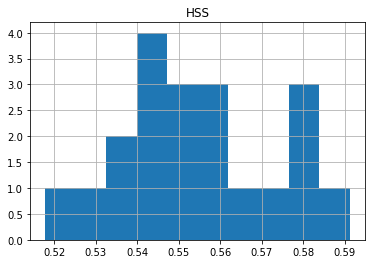

In [7]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro

#select x variables
#x_var = df_all1k.drop(columns=["Unnamed: 0","wxcodes_o","brfg_l"]).columns.to_list()  

# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

# loop random
HSS_ml = []
for t in range (0,20):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model=LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_ml.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_ml[t],2))

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nEstadísticas HSS")
# if p-value is lower than 5%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
print(pd.DataFrame(HSS_ml,columns=["HSS"]).describe())

print(shapiro(HSS_ml))
pd.DataFrame(HSS_ml,columns=["HSS"]).hist();

**Two-sample T test meteorological model vs machine learning**

In [16]:
import scipy.stats as stats

# Meteorological model HSS_met
mean1=0.46
std1 = 0.2
n1 = 20

# ML HSS_ml
mean2 =0.55
std2 = 0.2
n2 = 20

#Null Hypothesis H0 mean1=mean2

_,p_value=stats.ttest_ind(HSS_met,HSS_ml,equal_var= True)

print("p_value:",p_value)
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print("we are rejecting null hypothesis  H0 mean1=mean2")
else:
    print("we are accepting null hypothesis  H0 mean1=mean2")


p_value: 2.3857139781965995e-20
we are rejecting null hypothesis  H0 mean1=mean2


**Add time features**

In [11]:
df_all1k["hour"] = df_all1k.index.hour
df_all1k["month"] = df_all1k.index.month
df_all1k["dayofyear"] = df_all1k.index.dayofyear
df_all1k["weekofyear"] = df_all1k.index.weekofyear

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  after removing the cwd from sys.path.


In [ ]:

# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)
models

100%|██████████| 29/29 [01:19<00:00,  2.74s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.83,0.84,None,0.86,0.22
QuadraticDiscriminantAnalysis,0.85,0.83,None,0.87,0.74
NearestCentroid,0.84,0.83,None,0.86,0.51
BernoulliNB,0.83,0.82,None,0.85,0.22
SGDClassifier,0.88,0.80,None,0.89,0.43
Perceptron,0.88,0.76,None,0.89,0.31
LabelSpreading,0.90,0.75,None,0.90,13.35
LabelPropagation,0.90,0.75,None,0.90,10.07
LGBMClassifier,0.92,0.75,None,0.92,1.51



Matriz de Confusión  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2792    144  2936
RA/DZ          126    232   358
All           2918    376  3294
Heidke Skill Score: 0.59

Informe de calidad desagregado (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.956820  0.950954  0.953878  2936.000000
RA/DZ          0.617021  0.648045  0.632153   358.000000
accuracy       0.918033  0.918033  0.918033     0.918033
macro avg      0.786921  0.799499  0.793015  3294.000000
weighted avg   0.919890  0.918033  0.918912  3294.000000

Matriz de Confusión  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2733    174  2907
RA/DZ          141    246   387
All           2874    420  3294
Heidke Skill Score: 0.56

Informe de calidad desagregado (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.950939  0.940144  0.945511

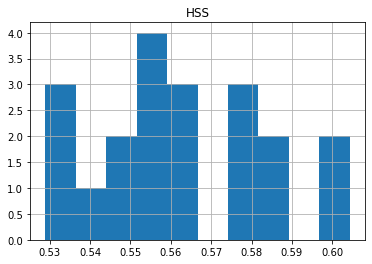

In [13]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro

#select x variables
#x_var = df_all1k.drop(columns=["Unnamed: 0","wxcodes_o","brfg_l"]).columns.to_list()  

# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

# loop ranadom
HSS_t = []
for t in range (0,20):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model=LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_t.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_t[t],2))

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nEstadísticas HSS")
# if p-value is lower than 5%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
print(pd.DataFrame(HSS_t,columns=["HSS"]).describe())

print(shapiro(HSS_t))
pd.DataFrame(HSS_t,columns=["HSS"]).hist();


**Two-sample T test compare machine learning with or without time features**

In [14]:
# ML HSS_ml
mean1 =0.55
std1 = 0.2
n1 = 20

# ML HSS_t
mean2 =0.562
std = 0.022
n2 = 20


#Null Hypothesis H0 mean1=mean2

_,p_value=stats.ttest_ind(HSS_t,HSS_ml,equal_var=False)

print("p_value:",p_value)
if p_value < 0.05:    # p value is 0.05 or 5%
    print("we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

p_value: 0.24147618922597044
we are accepting null hypothesis


****

In [ ]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("prec_LEVX_1km_time_d0.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=200))])


In [ ]:
import sklearn
print(sklearn.__version__)

0.24.1


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report


# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]


# loop random
HSS = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model = ExtraTreesClassifier(n_estimators=150).fit(X_res,y_res)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nEstadiísticas HSS")
pd.DataFrame(HSS,columns=["HSS"]).describe()


Matriz de Confusión  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2060    137  2197
RA/DZ           62    212   274
All           2122    349  2471
Heidke Skill Score: 0.64

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
No RA/DZ           0.97    0.94      0.95  2197.00
RA/DZ              0.61    0.77      0.68   274.00
accuracy           0.92    0.92      0.92     0.92
macro avg          0.79    0.86      0.82  2471.00
weighted avg       0.93    0.92      0.92  2471.00

Matriz de Confusión  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2036    161  2197
RA/DZ           67    207   274
All           2103    368  2471
Heidke Skill Score: 0.59

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
No RA/DZ           0.97    0.93      0.95  2197.00
RA/DZ              0.56    0.76   

,HSS
count,10.00
mean,0.61
std,0.02
min,0.58
25%,0.59
50%,0.61
75%,0.63
max,0.66
